In [6]:
import gym # openai gym to render the pre built encironment
import numpy as np # numy for q table value calculation
env=gym.make("CartPole-v1",render_mode="human")
#here are making the environment 
#render_mode="human" Renders the environments to help visualise what the agent see

In [7]:
print("env.action_space.n:",env.action_space.n) #possible action in the environment
print("env.observation_space.high",env.observation_space.high) #highest possible valuve observed in the environment
print("env.observation_space.low",env.observation_space.low) #lowest possible valuve observed in the environment

env.action_space.n: 2
env.observation_space.high [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
env.observation_space.low [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


In [ ]:
env.reset() # to rest the env to inital state
#0 Push cart to the left
#1 Push cart to the right

done = False # givibg false bcauz to do action in the env unitil i win

while not done :
    action=np.random.randint(2) # random values of 0 and 1 
    env.step(action) # to take action
    env.render()  # render the env with action
env.close()

In [ ]:
state=env.reset()
done= False

while not done:
    action=np.random.randint(2)
    #env.step() wil return 4 values 
    new_state , reward , done , info , a =env.step(action)
    print("reward",reward,"....new state",new_state)
    env.render()
env.close

In [ ]:
#the env is 4 dimensional 
#0 car position min:-4.8 max:4.8
#1 Cart Velocity min:-Inf max:Inf
#2 Pole Angle min:~-0.418 rad (-24°) max:~ 0.418 rad (24°)
#3 Pole Angular Velocity min:-Inf max:Inf
discrete_obs_size=[40]*len(env.observation_space.high)
print("discrete_obs_size",discrete_obs_size)

In [ ]:
#discrete observation window size
discrete_obs_win_size = (env.observation_space.high - env.observation_space.low)/discrete_obs_size
print("discrete_obs_win_size",discrete_obs_win_size)

In [ ]:
#q table initialization random value for negation rewards in q table initally
#so its make sense to be a strong starting point of q table
q_table=np.random.uniform(low =-2 , high= 0, size=(discrete_obs_size +[env.action_space.n]))
print("q_table.shape",q_table.shape)

In [ ]:
learning_rate=0.1
discount=0.99
episodes= 1000

In [ ]:
import gym
import numpy as np
env=gym.make("CartPole-v1",render_mode="human")
env.reset()

learning_rate=0.01
discount=0.99
episodes= 1000

discrete_obs_size=[40]*len(env.observation_space.high)
discrete_obs_win_size = (env.observation_space.high - env.observation_space.low)/discrete_obs_size
q_table=np.random.uniform(low =-2 , high= 0, size=(discrete_obs_size +[env.action_space.n]))

def get_discrete_state(state):
    discrete_state = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    discrete_state = np.round(num_states, 0).astype(int) + 1
    return discrete_state

done= False

while not done:
    action=np.random.randint(2)
    new_state , reward , done , info , a =env.step(action)
    print("reward",reward,"....new state",new_state)
    env.render()


In [ ]:
import gym
import numpy as np
import time

env = gym.make("CartPole-v1", render_mode="human")
env.reset()

learning_rate = 0.1
discount = 0.99
episodes = 2000

discrete_obs_size = [40] * len(env.observation_space.high)
discrete_obs_win_size = (env.observation_space.high - env.observation_space.low) / discrete_obs_size
q_table = np.random.uniform(low=-2, high=0, size=(discrete_obs_size + [env.action_space.n]))

def get_discrete_state(state):
    #if u get any error use this
    '''discrete_state = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    discrete_state = np.round(num_states, 0).astype(int) + 1
    return discrete_state'''
    
    discrete_state = (state - env.observation_space.low) / discrete_obs_win_size
    return tuple(discrete_state.astype(np.int))

done = False

while not done:
    state = env.state  # Get the state directly
    discrete_state = get_discrete_state(state)
    
    action = np.argmax(q_table[discrete_state]) # to do the action with max value in the q table
    new_state, reward, done, info , a = env.step(action)
    new_discrete_state = get_discrete_state(new_state)# perform action for new state 
    print("reward", reward, "....new state", new_state)
    env.render()
    
    #need to update the q value using Bellman's equation
    #new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
    if not done:
        #maximim q value in the next possible actions
        max_future_q=np.max(q_table[new_discrete_state])
        
        # current q value current state and performed action
        current_q =q_table[discrete_state + (action,)]
        
        #Bellman's equation for new q
        new_q = (1 - learning_rate)* current_q +learning_rate *(reward + discount * max_future_q)
        
        #update the q table with new q value
        q_table[discrete_state + (action,)]=new_q
    
    '''# Simulation ended (for any reson) - if goal position is achived - update Q value with reward directly
    else:
        #q_table[discrete_state + (action,)] = reward
        q_table[discrete_state + (action,)] = 0'''
        
        

env.close()


In [ ]:
#to run the env even after achieving the goal so we can train by back propogating
epsilon=1 # not a constant, qoing to be decayed
start_epsilon_decay=1
end_epsilon_decay=episodes//2
epsilon_decay_value = epsilon/(end_epsilon_decay - start_epsilon_decay)

# Decaying is being done every episode if episode number is within decaying range
if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
    epsilon -= epsilon_decay_value



In [25]:
import gym
import numpy as np
import time
import matplotlib.pyplot as plt
env = gym.make("CartPole-v1", render_mode="human")
env.reset()

learning_rate = 0.1
discount = 0.99
episodes = 2000
SHOW_EVERY = 1000
STATS_EVERY = 100
epsilon=1 # not a constant, qoing to be decayed
start_epsilon_decay=1
end_epsilon_decay=episodes//2
epsilon_decay_value = epsilon/(end_epsilon_decay - start_epsilon_decay)
ep_rewards = []# to store rewards each episodes
aggr_ep_rewards = {'ep': [], 'avg': [], 'max': [], 'min': []}#dict to store ep no , avg , max , min

discrete_obs_size = [40] * len(env.observation_space.high)
discrete_obs_win_size = (env.observation_space.high - env.observation_space.low) / discrete_obs_size
q_table = np.random.uniform(low=-2, high=0, size=(discrete_obs_size + [env.action_space.n]))

def get_discrete_state(state):
    #if u get any error use this
    ''''discrete_state = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    discrete_state = np.round(num_states, 0).astype(int) + 1
    return discrete_state'''
    
    discrete_state = (state[0] - env.observation_space.low) / discrete_obs_win_size
    return tuple(discrete_state.astype(np.int))

for episode in range(episodes):
    episode_reward = 0
    
    discrete_state = get_discrete_state(env.reset())
    done = False
    
    if episode % SHOW_EVERY == 0:
        render = True
        print(episode)
    else:
        render = False
        
    
    while not done:
        state = env.state  # Get the state directly
        discrete_state = get_discrete_state(state)
    
        action = np.argmax(q_table[discrete_state]) # to do the action with max value in the q table
        print("action",action)
        new_state, reward, done, info , a = env.step(action)
        episode_reward += reward #adding reward seperately for graphing 
        print("episode_reward",episode_reward)
        new_discrete_state = get_discrete_state(new_state)# perform action for new state 
        #print("reward", reward, "....new state", new_state)
        
        if episode % SHOW_EVERY == 0:
            env.render()
    
        #need to update the q value using Bellman's equation
        #new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
        if not done:
            #maximim q value in the next possible actions
            max_future_q=np.max(q_table[new_discrete_state])
        
            # current q value current state and performed action
            current_q =q_table[discrete_state + (action,)]
        
            #Bellman's equation for new q
            new_q = (1 - learning_rate)* current_q +learning_rate *(reward + discount * max_future_q)
        
            #update the q table with new q value
            q_table[discrete_state + (action,)]=new_q
        
        '''# Simulation ended (for any reson) - if goal position is achived - update Q value with reward directly
        else:
            #q_table[discrete_state + (action,)] = reward
            q_table[discrete_state + (action,)] = 0'''
    if end_epsilon_decay >= episode >= start_epsilon_decay:
        epsilon -= epsilon_decay_value
    
    ep_rewards.append(episode_reward)
    if not episode % STATS_EVERY:
        average_reward = sum(ep_rewards[-STATS_EVERY:])/STATS_EVERY
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['max'].append(max(ep_rewards[-STATS_EVERY:]))
        aggr_ep_rewards['min'].append(min(ep_rewards[-STATS_EVERY:]))
        print(f'Episode: {episode:>5d}, average reward: {average_reward:>4.1f}, current epsilon: {epsilon:>1.2f}')

        
env.close()


C:\Users\deepa\AppData\Local\Temp\ipykernel_18264\3441628694.py:21: RuntimeWarning: overflow encountered in subtract
  discrete_obs_win_size = (env.observation_space.high - env.observation_space.low) / discrete_obs_size
C:\Users\deepa\AppData\Local\Temp\ipykernel_18264\3441628694.py:32: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))


0
action 0
episode_reward 1.0
action 0
episode_reward 2.0
action 0
episode_reward 3.0
action 0
episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 1
episode_reward 8.0
action 1
episode_reward 9.0
action 0
episode_reward 10.0
action 0
episode_reward 11.0
Episode:     0, average reward:  0.1, current epsilon: 1.00
action 0
episode_reward 1.0
action 0
episode_reward 2.0
action 0
episode_reward 3.0
action 0
episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 0
episode_reward 8.0
action 1
episode_reward 9.0
action 0
episode_reward 1.0
action 0
episode_reward 2.0
action 0
episode_reward 3.0
action 0
episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 1
episode_reward 8.0
action 0
episode_reward 1.0
action 0
episode_reward 2.0
action 0
episode_reward 3.0
action 0
episode_reward 4.0
action 0
episode_reward 5.0
action 0
epi

episode_reward 7.0
action 1
episode_reward 8.0
action 1
episode_reward 9.0
action 0
episode_reward 10.0
action 0
episode_reward 11.0
action 0
episode_reward 1.0
action 0
episode_reward 2.0
action 0
episode_reward 3.0
action 0
episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 0
episode_reward 8.0
action 0
episode_reward 9.0
action 0
episode_reward 1.0
action 0
episode_reward 2.0
action 0
episode_reward 3.0
action 0
episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 0
episode_reward 8.0
action 0
episode_reward 9.0
action 1
episode_reward 10.0
action 0
episode_reward 1.0
action 0
episode_reward 2.0
action 0
episode_reward 3.0
action 0
episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 0
episode_reward 8.0
action 0
episode_reward 9.0
action 0
episode_reward 1.0
action 0
episode_reward 2.0
action 0
episode_reward 3.

episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 0
episode_reward 8.0
action 0
episode_reward 1.0
action 0
episode_reward 2.0
action 0
episode_reward 3.0
action 0
episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 1
episode_reward 8.0
action 0
episode_reward 9.0
action 0
episode_reward 10.0
action 0
episode_reward 1.0
action 0
episode_reward 2.0
action 0
episode_reward 3.0
action 0
episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 1
episode_reward 8.0
action 1
episode_reward 9.0
action 0
episode_reward 1.0
action 0
episode_reward 2.0
action 0
episode_reward 3.0
action 0
episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 0
episode_reward 8.0
action 1
episode_reward 9.0
action 1
episode_reward 10.0
action 0
episode_reward 1.0
action 0
episode_reward 2.0

episode_reward 9.0
action 0
episode_reward 1.0
action 0
episode_reward 2.0
action 0
episode_reward 3.0
action 0
episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 0
episode_reward 8.0
action 1
episode_reward 9.0
action 0
episode_reward 10.0
action 0
episode_reward 1.0
action 0
episode_reward 2.0
action 0
episode_reward 3.0
action 0
episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 0
episode_reward 8.0
action 0
episode_reward 1.0
action 0
episode_reward 2.0
action 0
episode_reward 3.0
action 0
episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 0
episode_reward 8.0
action 0
episode_reward 9.0
action 0
episode_reward 1.0
action 0
episode_reward 2.0
action 0
episode_reward 3.0
action 0
episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 0
episode_reward 8.0


episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 0
episode_reward 8.0
action 0
episode_reward 1.0
action 0
episode_reward 2.0
action 0
episode_reward 3.0
action 0
episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 0
episode_reward 8.0
action 0
episode_reward 9.0
action 1
episode_reward 10.0
action 0
episode_reward 1.0
action 0
episode_reward 2.0
action 0
episode_reward 3.0
action 0
episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 0
episode_reward 8.0
action 0
episode_reward 9.0
action 1
episode_reward 10.0
action 0
episode_reward 1.0
action 0
episode_reward 2.0
action 0
episode_reward 3.0
action 0
episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 1
episode_reward 8.0
action 0
episode_reward 9.0
action 0
episode_reward 10.0
action 1
episode_reward 11

episode_reward 7.0
action 0
episode_reward 8.0
action 1
episode_reward 9.0
action 0
episode_reward 1.0
action 0
episode_reward 2.0
action 0
episode_reward 3.0
action 0
episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 1
episode_reward 8.0
action 1
episode_reward 9.0
action 0
episode_reward 10.0
action 0
episode_reward 1.0
action 0
episode_reward 2.0
action 0
episode_reward 3.0
action 0
episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 0
episode_reward 8.0
action 1
episode_reward 9.0
action 1
episode_reward 10.0
action 0
episode_reward 11.0
action 0
episode_reward 1.0
action 0
episode_reward 2.0
action 0
episode_reward 3.0
action 0
episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 0
episode_reward 8.0
action 0
episode_reward 9.0
action 0
episode_reward 10.0
action 0
episode_reward 1.0
action 0
episode_reward 2

episode_reward 2.0
action 0
episode_reward 3.0
action 0
episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 0
episode_reward 8.0
action 0
episode_reward 9.0
action 0
episode_reward 1.0
action 0
episode_reward 2.0
action 0
episode_reward 3.0
action 0
episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 0
episode_reward 8.0
action 0
episode_reward 9.0
action 0
episode_reward 1.0
action 0
episode_reward 2.0
action 0
episode_reward 3.0
action 0
episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 0
episode_reward 8.0
action 0
episode_reward 9.0
action 1
episode_reward 10.0
action 0
episode_reward 1.0
action 0
episode_reward 2.0
action 0
episode_reward 3.0
action 0
episode_reward 4.0
action 0
episode_reward 5.0
action 0
episode_reward 6.0
action 0
episode_reward 7.0
action 0
episode_reward 8.0
action 0
episode_reward 9.0


KeyboardInterrupt: 

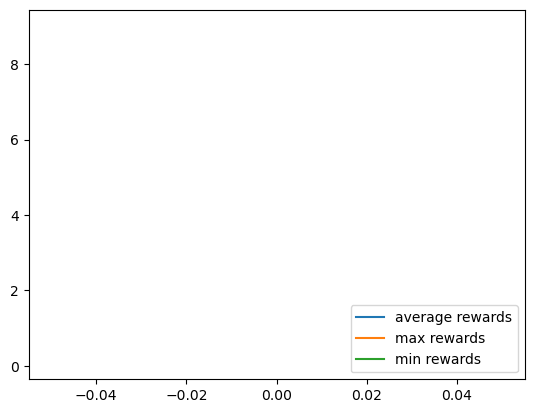

In [24]:
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label="average rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label="max rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label="min rewards")
plt.legend(loc=4)
plt.show()